In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
import visualkeras

import os, sys
path_root = os.path.abspath('..')
sys.path.insert(0, path_root)
from utils.load_labels import DataLabels

from datasets import load_dataset
import warnings
warnings.filterwarnings("ignore")

/Users/ai-almagribisadli/miniconda3/envs/mnist/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h2>1. Load Dataset</h2>
Many machine learning libraries already include the Fashion-MNIST dataset and API. Here, I will load the MNIST from huggingface datasets

In [2]:
fashion_mnist = load_dataset("zalando-datasets/fashion_mnist")

"""load label list"""
class_labels = DataLabels().labels_list

<h2>2. Data Preprocessing</h2>
Splitting the dataset into training and test sets.

In [3]:
x_train = np.array(fashion_mnist["train"]["image"])
y_train = np.array(fashion_mnist["train"]["label"])
x_test = np.array(fashion_mnist["test"]["image"])
y_test = np.array(fashion_mnist["test"]["label"])

In [4]:
"""Normalizing the data to a range between 0 and 1.  
I divide by 255 because pixel values range from 0 to 255.  
Scaling the pixel values helps the model learn faster and more effectively. """
x_train = x_train / 255.0  
x_test = x_test / 255.0  


In [5]:
"""Reshape data to 28x28x1 (grayscale image format)."""
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

<h2>3. Model Training</h2>
Here, I will use a machine learning approach with the Convolutional Neural Network (CNN) algorithm because it is effective for image classification tasks

In [6]:
"""setup model"""
cnn_model = models.Sequential()

"""first CONV => RELU => CONV => RELU => POOL layer set"""
cnn_model.add(layers.Conv2D(32, (3, 3), padding="same",input_shape=(28,28,1)))
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.BatchNormalization(axis=3))
cnn_model.add(layers.Conv2D(32, (3, 3), padding="same"))
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.BatchNormalization(axis=3))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Dropout(0.25))

"""second CONV => RELU => CONV => RELU => POOL layer set"""
cnn_model.add(layers.Conv2D(64, (3, 3), padding="same"))
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.BatchNormalization(axis=3))
cnn_model.add(layers.Conv2D(64, (3, 3), padding="same"))
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.BatchNormalization(axis=3))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Dropout(0.25))

"""first (and only) set of FC => RELU layers"""
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512))
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.5))

"""softmax classifier"""
cnn_model.add(layers.Dense(10))
cnn_model.add(layers.Activation("softmax"))

"""model summary"""
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,679,082 (6.41 MB)

 Trainable params: 1,677,674 (6.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

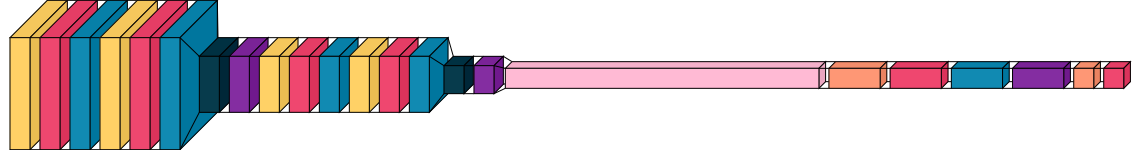

In [7]:
"""visualize model"""
visualkeras.layered_view(cnn_model)

In [8]:
"""setup training params"""
early_stopping_callback = callbacks.EarlyStopping(
    patience=10)
batch_size = 256
cnn_model.compile(RMSprop(learning_rate=0.0005, decay=1e-6),
                            loss='sparse_categorical_crossentropy',
                            metrics=["accuracy"])
epochs_info = cnn_model.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=100,
                            callbacks=[early_stopping_callback],
                            validation_split=0.2)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.7428 - loss: 0.8371 - val_accuracy: 0.4602 - val_loss: 1.6988
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 204ms/step - accuracy: 0.8641 - loss: 0.3876 - val_accuracy: 0.7475 - val_loss: 0.8368
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 215ms/step - accuracy: 0.8894 - loss: 0.3083 - val_accuracy: 0.8487 - val_loss: 0.4424
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.9063 - loss: 0.2643 - val_accuracy: 0.9136 - val_loss: 0.2394
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 222ms/step - accuracy: 0.9096 - loss: 0.2416 - val_accuracy: 0.9163 - val_loss: 0.2259
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - accuracy: 0.9177 - loss: 0.2249 - val_accuracy: 0.8982 - val_loss: 0.2965
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 47s 251ms/step - accuracy: 0.9228 - loss: 0.2096 - val_accuracy: 0.9229 - val_loss: 0.2162
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 52s 274ms/step - accuracy: 0.9299 -

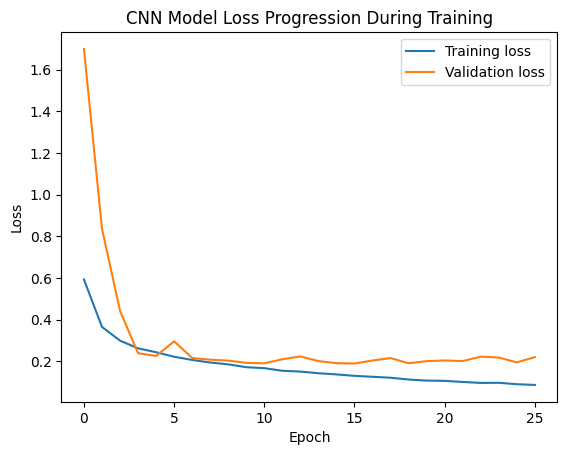

In [9]:
"""training and validation loss"""
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("CNN Model Loss Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

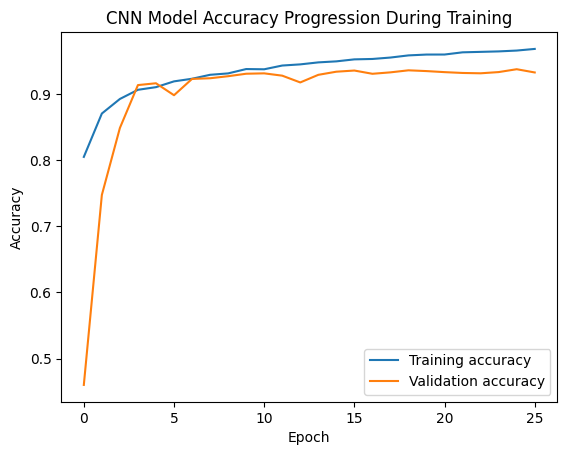

In [10]:
"""training and validation accuracy"""
plt.plot(epochs_info.history['accuracy'])
plt.plot(epochs_info.history['val_accuracy'])
plt.title("CNN Model Accuracy Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

In [11]:
cnn_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9280 - loss: 0.2482


[0.24307775497436523, 0.9266999959945679]

In [12]:
y_pred = cnn_model.predict(x_test)

"""Get the class with highest predicted probability and assume it is the model prediction."""
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


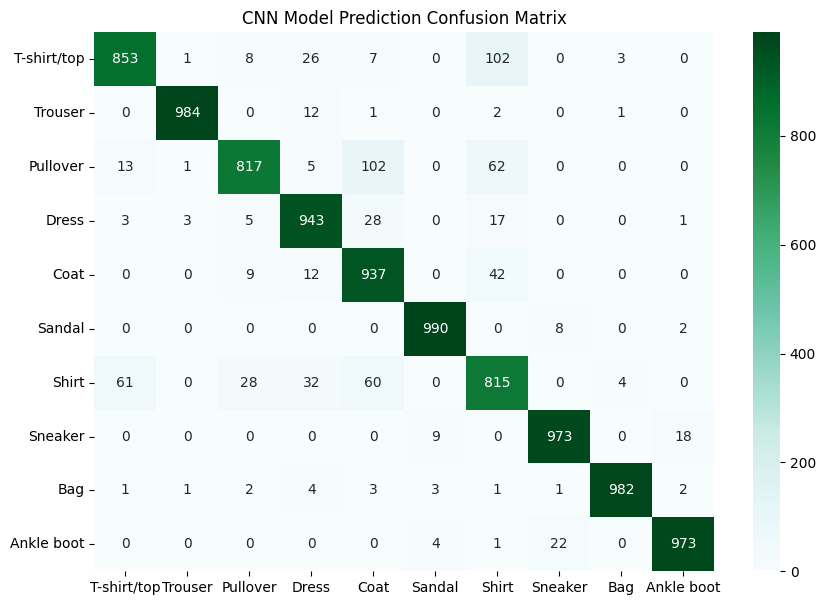

In [13]:
"""plot model confussion matrix"""
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True,fmt="d", cmap="BuGn", xticklabels = class_labels, yticklabels = class_labels)
plt.title("CNN Model Prediction Confusion Matrix")
plt.show()

<h2>5. Save Model</h2>
Save model to h5 to load it later for inference.

In [14]:
import joblib

"""Save the model to pickle file"""
cnn_model.save( os.path.join("..", "models", "cnn","model.keras"))
print("Model saved successfully!")

Model saved successfully!
